In [119]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
from importlib.metadata import version

print('Used versions:')
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(version('scipy')))
print('numpy: {}'.format(version('numpy')))
print('matplotlib: {}'.format(version('matplotlib')))
print('pandas: {}'.format(version('pandas')))
print('sklearn: {}'.format(version('scikit-learn')))

Used versions:
Python: 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
scipy: 1.10.1
numpy: 1.24.4
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 1.3.2


In [120]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [121]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(dataset_url, names=names)

print(dataset.shape)

(150, 5)


In [122]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [123]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [124]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


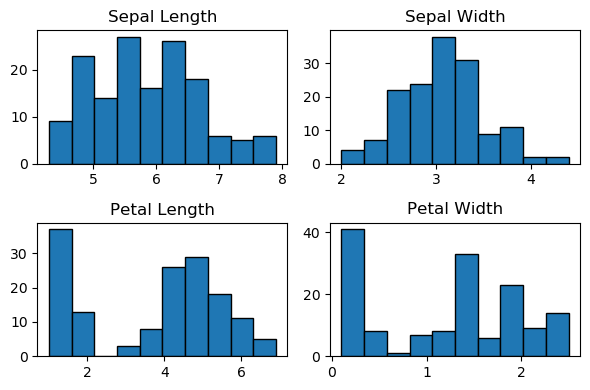

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

axes[0, 0].hist(dataset['sepal-length'], bins=10, edgecolor='black')
axes[0, 0].set_title('Sepal Length')

axes[0, 1].hist(dataset['sepal-width'], bins=10, edgecolor='black')
axes[0, 1].set_title('Sepal Width')

axes[1, 0].hist(dataset['petal-length'], bins=10, edgecolor='black')
axes[1, 0].set_title('Petal Length')

axes[1, 1].hist(dataset['petal-width'], bins=10, edgecolor='black')
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')


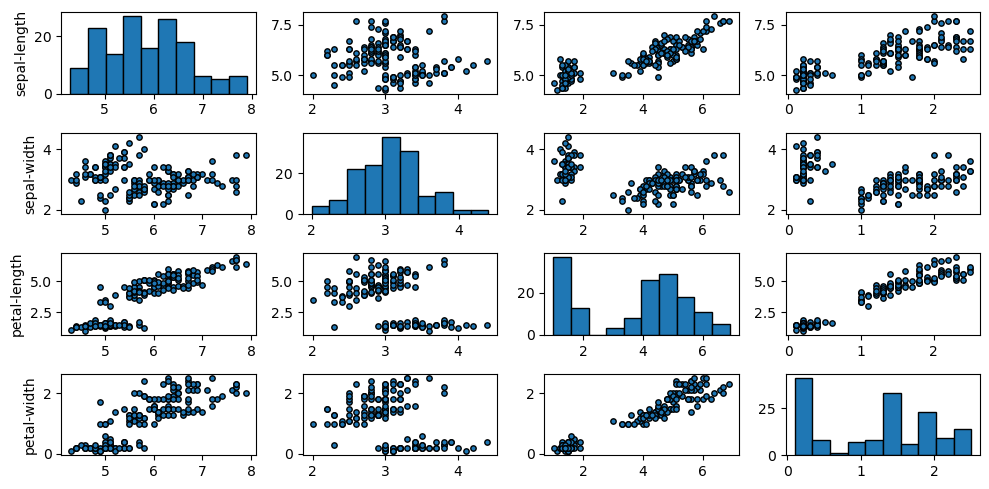

In [144]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 5))
print(dataset.columns)

for i in range(len(dataset.columns)-1):
    for j in range(len(dataset.columns)-1):
        ax = axes[i, j]
        if i == j:
            ax.hist(dataset.iloc[:, i], bins=10, edgecolor='black')
        else:
            ax.scatter(dataset.iloc[:, j], dataset.iloc[:, i], edgecolor='black', s=15.0)
        if i == len(dataset.columns) - 1:
            ax.set_xlabel(dataset.columns[j])
        if j == 0:
            ax.set_ylabel(dataset.columns[i])

plt.tight_layout()
plt.show()

In [145]:
# Splitting data for training and validation
array = dataset.values
x = array[:,0:4]
y = array[:,4]

validation_size = 0.20
seed = 7

x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)


In [146]:
# Evaluation metric
scoring = 'accuracy'


In [171]:
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))


In [176]:
results = []
names = []

for name, model in models:
    k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=k_fold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f +/- %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 +/- 0.033333
KNN: 0.983333 +/- 0.033333
SVM: 0.983333 +/- 0.033333


In [188]:
# Predictions

for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_validation)
    print("%s: %f" % (name, accuracy_score(y_validation, predictions)))
    print(classification_report(y_validation, predictions))
    print(confusion_matrix(y_validation, predictions))
    print("\n")

LR: 0.866667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


KNN: 0.900000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


SVM: 0.866667
                 precision    recall  f1-score   support

    Iris-setosa    